In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import datetime as dt
# pd.set_option('max_columns', None)

# Analyse Daily Activity includes steps,sleep,calories

In [3]:
df = pd.read_csv('dailyActivity_merged.csv')
df.shape

(940, 15)

In [4]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [5]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [6]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

# Clean The data

In [7]:
# Change to correct data type
df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format='%m/%d/%Y')
df.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [9]:
# Total Distance and Tracker Distance seem the same so lets check what it is for. 
# Is it just the sum of all tackered activity distances
df['distance_diff'] = df['TotalDistance'] - df['TrackerDistance']

In [10]:
df['distance_diff'].value_counts()

distance_diff
0.000000    925
1.830000      1
0.190001      1
0.040000      1
0.810000      1
1.049999      1
0.760000      1
1.070000      1
0.980000      1
0.900001      1
1.140000      1
1.160000      1
0.880000      1
0.460000      1
1.160000      1
1.060000      1
Name: count, dtype: int64

In [12]:
df.query('distance_diff > 0.0')

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,distance_diff
689,6962181067,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179,1.830000
693,6962181067,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194,0.190001
707,6962181067,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105,0.040000
711,7007744171,2016-04-12,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937,0.810000
712,7007744171,2016-04-13,12862,9.65,8.60,4.851307,4.61,0.56,4.48,0.00,56,22,261,1101,2742,1.049999
713,7007744171,2016-04-14,11179,8.24,7.48,3.285415,2.95,0.34,4.96,0.00,34,6,304,1096,2668,0.760000
717,7007744171,2016-04-18,14816,10.98,9.91,4.930550,3.79,2.12,5.05,0.02,48,31,284,1077,2832,1.070000
718,7007744171,2016-04-19,14194,10.48,9.50,4.942142,4.41,0.76,5.31,0.00,53,17,304,1066,2812,0.980000
719,7007744171,2016-04-20,15566,11.31,10.41,4.924841,4.79,0.67,5.86,0.00,60,33,347,1000,3096,0.900001
724,7007744171,2016-04-25,18229,13.34,12.20,4.861792,4.31,1.37,7.67,0.00,51,24,379,986,3055,1.140000


Therfore the TotalDistance and TrackerDistance is not same, they are different values 

In [14]:
#Rename 
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'activitydate', 'totalsteps', 'totaldistance', 'trackerdistance',
       'loggedactivitiesdistance', 'veryactivedistance',
       'moderatelyactivedistance', 'lightactivedistance',
       'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
       'lightlyactiveminutes', 'sedentaryminutes', 'calories',
       'distance_diff'],
      dtype='object')

In [21]:
df.rename(columns = {'activitydate' :'activity-date', 'totalsteps': 'total_steps', 'totaldistance': 'total_distance',
'trackerdistance' : 'tracker_distance',
'loggedactivitiesdistance': 'logged_activities_distance',
'veryactivedistance': 'very_active_distance', 
'moderatelyactivedistance': 'moderately-active_distance',
'lightactivedistance': 'light_active_distance', 
'sedentaryactivedistance': ' sedentary-active_distance',
'veryactiveminutes': 'very_active_minutes',
'fairlyactiveminutes': 'fairly_active_minutes',
'lightlyactiveminutes': 'lightly_active_minutes', 
'sedentaryminutes': 'sedentary-minutes'}, inplace=True)
df.columns

Index(['id', 'activity-date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately-active_distance',
       'light_active_distance', ' sedentary-active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary-minutes', 'calories',
       'distance_diff'],
      dtype='object')

In [24]:
# Create coloumns for days
day_of_week= df['activity-date'].dt.day_name()
df['day_of_week'] = day_of_week

df['n_day_of_week'] = df['activity-date'].dt.weekday # number value of day of week 0 = Monday, 6= Sunday 

In [25]:
df.head()

,id,activity-date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately-active_distance,light_active_distance,sedentary-active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary-minutes,calories,distance_diff,day_of_week,n_day_of_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0.0,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,0.0,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,0.0,Thursday,3
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,0.0,Friday,4
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,0.0,Saturday,5


In [29]:
# Check for null values 
# Check for missing or null values in the DataFrame
df.isna().sum()

id                            0
activity-date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately-active_distance    0
light_active_distance         0
 sedentary-active_distance    0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary-minutes             0
calories                      0
distance_diff                 0
day_of_week                   0
n_day_of_week                 0
dtype: int64

In [30]:
# Check duplicates
df.duplicated().sum()

0

In [31]:
# subset the data to only include the columns we need
# we dont know the metric for distance km/meter/miles but it is correlated to steps so we wont use any distance 
df_sub = df[['id', 'activity-date', 'total_steps', 'total_distance',
    #    'tracker_distance', 'logged_activities_distance',
    #    'very_active_distance', 'moderately-active_distance',
    #    'light_active_distance', ' sedentary-active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary-minutes', 'calories',
    #    'distance_diff'
       ]]

In [37]:
df = df_sub
df.head()


,id,activity-date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary-minutes,calories
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,36,10,221,773,1863


In [48]:
#Analysis 
# sedentry: less than 6000 steps on average
# active: between 6000-12000 steps on average 
# very active: more than 12000 steps on average

df['id'].unique() # 33 unique users
df['activity-date'].value_counts() # data is only 1 month
id_group = df.groupby('id')
id_avg_steps = id_group['total_steps'].mean().sort_values(ascending=False)
id_avg_steps = id_avg_steps.to_frame()
id_avg_steps.columns = ['avg_steps']

conditions = [ 
    (id_avg_steps['avg_steps'] < 6000),
    (id_avg_steps['avg_steps'] >= 6000) & (id_avg_steps['avg_steps'] < 12000),
    (id_avg_steps['avg_steps'] >= 12000)
]
values = ['sedentry', 'active', 'very active']
id_avg_steps['activity_level'] = np.select(conditions, values)

id_activity_level = id_avg_steps['activity_level']

id_avg_steps

df['activity_level'] = [id_activity_level[c] for c in df['id']]

df.head()

,id,activity-date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary-minutes,calories,activity_level
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,very active
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,very active
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,very active
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,very active
4,1503960366,2016-04-16,12669,8.16,36,10,221,773,1863,very active


In [96]:
# 2nd category # To find usage of the watch, 
# we can use the sedentary minutes column. 
# low use: less than 8 hours per day
# normal use: between 8 and 16 hours per day
# high use: more than 16 hours and up to 24 hours
id_group = df.groupby('id')

# Calculate mean of each activity column
id_avg_very_active_minutes = id_group['very_active_minutes'].mean().to_frame(name='avg_very_active_minutes')
id_fairly_active_minutes = id_group['fairly_active_minutes'].mean().to_frame(name='avg_fairly_active_minutes')
id_lightly_active_minutes = id_group['lightly_active_minutes'].mean().to_frame(name='avg_lightly_active_minutes')
id_sedentary_minutes = id_group['sedentary-minutes'].mean().to_frame(name='avg_sedentary_minutes')

combined_frame = pd.concat([id_avg_very_active_minutes, id_fairly_active_minutes, id_lightly_active_minutes, id_sedentary_minutes], axis=1)

# Print the combined DataFrame
# print(combined_frame.head(1))
combined_frame['total_active_minutes'] = combined_frame.sum(axis=1)
conditions = [
    (combined_frame['total_active_minutes'] < 13 * 60),
    (combined_frame['total_active_minutes'] >= 13 * 60) & (combined_frame['total_active_minutes'] < 17 * 60),
    (combined_frame['total_active_minutes'] >= 17 * 60)
]
values = ['low use', 'normal use', 'high use']
combined_frame['usage_category'] = np.select(conditions, values)

combined_frame

# Now lets add the usage category to the main dataframe
df['usage_category'] = [combined_frame['usage_category'][c] for c in df['id']]

combined_frame


,avg_very_active_minutes,avg_fairly_active_minutes,avg_lightly_active_minutes,avg_sedentary_minutes,total_active_minutes,usage_category
id,,,,,,
1503960366,38.709677,19.161290,219.935484,848.161290,1125.967742,high use
1624580081,8.677419,5.806452,153.483871,1257.741935,1425.709677,high use
1644430081,9.566667,21.366667,178.466667,1161.866667,1371.266667,high use
1844505072,0.129032,1.290323,115.451613,1206.612903,1323.483871,high use
1927972279,1.322581,0.774194,38.580645,1317.419355,1358.096774,high use
2022484408,36.290323,19.354839,257.451613,1112.580645,1425.677419,high use
2026352035,0.096774,0.258065,256.645161,689.419355,946.419355,normal use
2320127002,1.354839,2.580645,198.193548,1220.096774,1422.225806,high use
2347167796,13.500000,20.555556,252.500000,687.166667,973.722222,normal use


In [91]:
df['id'].nunique() # 33 unique users
df.columns

Index(['id', 'activity-date', 'total_steps', 'total_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary-minutes', 'calories',
       'activity_level', 'usage_category'],
      dtype='object')

In [78]:
print(df['activity-date'].nunique())

df['id'].value_counts() # not all users have the same number of entries for the data 

31


id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64

In [85]:
df.describe() # The data has may have outliers such as the max steps, calories 

,activity-date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary-minutes,calories
count,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,2016-04-26 06:53:37.021276672,7637.910638,5.489702,21.164894,13.564894,192.812766,991.210638,2303.609574
min,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-19 00:00:00,3789.750000,2.620000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,2016-04-26 00:00:00,7405.500000,5.245000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,2016-05-04 00:00:00,10727.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,2016-05-12 00:00:00,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000
std,NaN,5087.150742,3.924606,32.844803,19.987404,109.174700,301.267437,718.166862


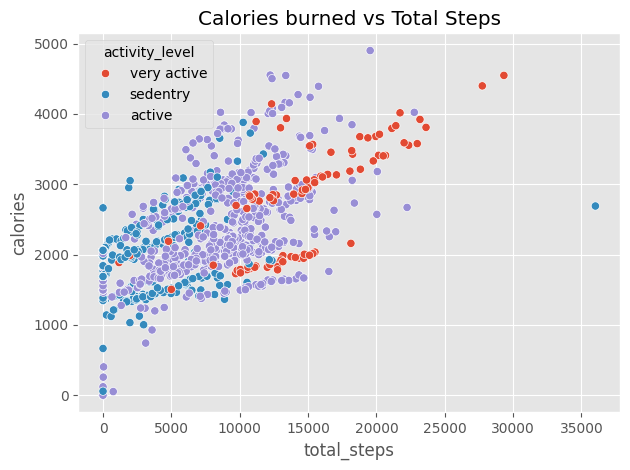

In [88]:
# Correlation between steps and calories burned
ax = sns.scatterplot(x='total_steps', y='calories', data=df, hue=df['activity_level'])
plt.title('Calories burned vs Total Steps')
plt.tight_layout()
plt.show()

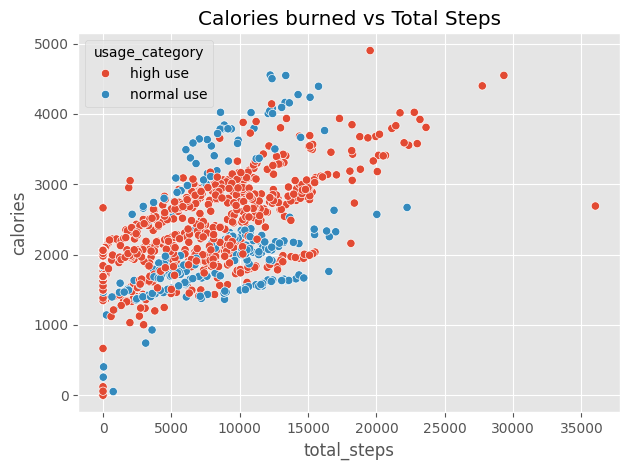

In [97]:
# Correlation between steps and calories burned
ax = sns.scatterplot(x='total_steps', y='calories', data=df, hue=df['usage_category'])
plt.title('Calories burned vs Total Steps')
plt.tight_layout()
plt.show()

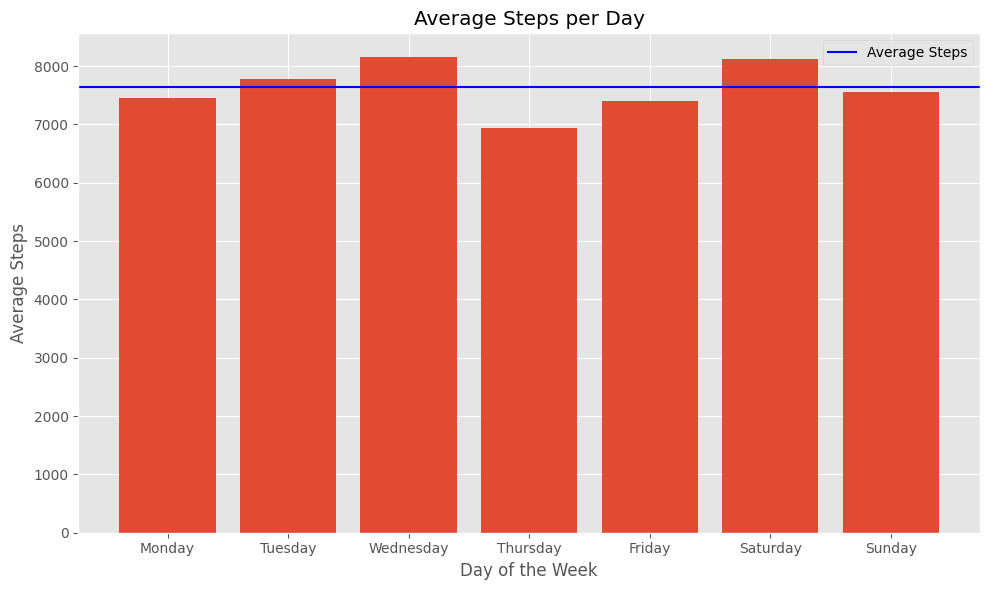

In [112]:
# Average steps per day

# Create coloumns for days
day_of_week= df['activity-date'].dt.day_name()
df['day_of_week'] = day_of_week

df['n_day_of_week'] = df['activity-date'].dt.weekday 
df.head()

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

day =[ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_grp = df.groupby(['day_of_week'])
avg_daily=steps = day_grp['total_steps'].mean()
avg_steps = df['total_steps'].mean()

plt.bar(avg_daily.index, avg_daily)

ax.set_xticks(range(len(day)))
ax.set_xticklabels(day)

ax.axhline(avg_steps, color='blue', label='Average Steps')
ax.set_title('Average Steps per Day')
ax.set_ylabel('Average Steps')
ax.set_xlabel('Day of the Week')
plt.legend()
plt.tight_layout()
plt.show()


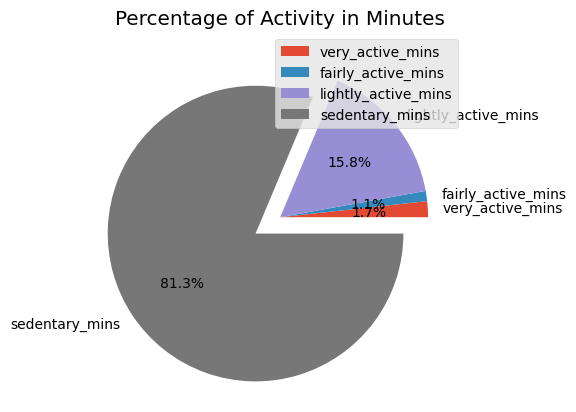

In [123]:
#percentage of activity in mins 
very_active_mins = df['very_active_minutes'].sum()
fairly_active_mins = df[ 'fairly_active_minutes'].sum()
lightly_active_mins = df['lightly_active_minutes'].sum()
sedentary_mins = df['sedentary-minutes'].sum()
slices = [very_active_mins,fairly_active_mins,lightly_active_mins, sedentary_mins]
labels = ['very_active_mins', 'fairly_active_mins', 'lightly_active_mins', 'sedentary_mins' ]
explode = [0,0,0,0.2]
plt.pie(slices, labels=labels, explode = explode, autopct = '%1.1f%%')
plt.title('Percentage of Activity in Minutes')
# plt.legend()
plt.show()